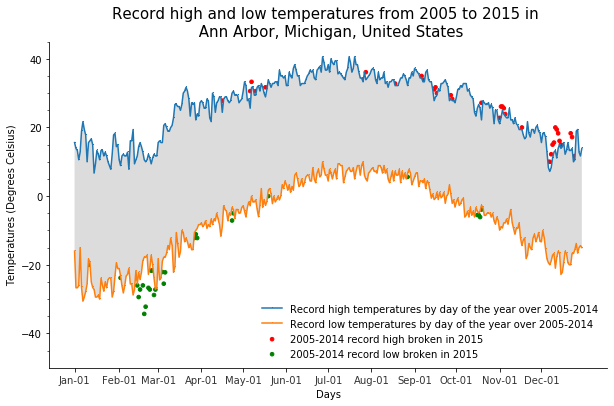

In [4]:
# Return a line graph of the record high and record low temperatures 
# by day of the year over the period 2005-2014. The area between the
# record high and record low temperatures for each day should be shaded.

import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt


def graph_one():
    
    df = pd.read_csv('data\\records.csv')
    df['ID'] = list(map(lambda x: x[5:10], df['Date'].tolist()))
    df['Data_Value'] = list(map(lambda x: x/10, df['Data_Value'].tolist()))
    
    filter1 = df["Element"]=="TMAX"
    filter2 = df["Date"]<'2015-01-01'
    filter3 = df["ID"] != '02-29'
    df_2005to2014_max = df.where(filter1 & filter2 & filter3).dropna()
    max_temps = df_2005to2014_max.groupby(['ID', 'Element'], as_index=False)['Data_Value'].max()['Data_Value'].tolist()  
    
    filter1 = df["Element"]=="TMIN"
    filter2 = df["Date"]<'2015-01-01'
    filter3 = df["ID"] != '02-29'
    df_2005to2014_min = df.where(filter1 & filter2 & filter3).dropna()
    min_temps = df_2005to2014_min.groupby(['ID', 'Element'], as_index=False)['Data_Value'].min()['Data_Value'].tolist()
    
        
    fig =plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    plt.plot(max_temps, '-,',min_temps, '-,')
    
    plt.title('Record high and low temperatures from 2005 to 2015 in \n Ann Arbor, Michigan, United States', size = 15)
    plt.ylabel('Temperatures (Degrees Celsius)')
    plt.xlabel('Days')
    
    month=['Jan-01','Feb-01','Mar-01','Apr-01','May-01','Jun-01','Jul-01','Aug-01','Sep-01','Oct-01','Nov-01','Dec-01']
    DayOfMonth=[0,32,60,91,121,152,182,213,244,274,305,335]
    plt.xticks(DayOfMonth)
    plt.xticks(DayOfMonth,month,alpha=0.8)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
    
    filter1 = df["Element"]=="TMAX"
    filter2 = df["Date"]>'2014-12-31'
    df_2015_max = df.where(filter1 & filter2).dropna()
    max_temps_2015 = df_2015_max.groupby(['ID', 'Element'], as_index=False)['Data_Value'].max()['Data_Value'].tolist()  
    max_record_function = lambda x: max_temps_2015[x] if (max_temps_2015[x]>max_temps[x]) else np.nan
    max_temps_record_2015 = pd.Series(map(max_record_function, range(365))).dropna()
    max_temps_record_2015_values = max_temps_record_2015.tolist()
    max_temps_record_2015_index = max_temps_record_2015.index

    filter1 = df["Element"]=="TMIN"
    filter2 = df["Date"]>'2014-12-31'
    df_2015_min = df.where(filter1 & filter2).dropna()
    min_temps_2015 = df_2015_min.groupby(['ID', 'Element'], as_index=False)['Data_Value'].min()['Data_Value'].tolist()  
    min_record_function = lambda x: min_temps_2015[x] if (min_temps_2015[x]<min_temps[x]) else np.nan
    min_temps_record_2015 = pd.Series(map(min_record_function, range(365))).dropna()
    min_temps_record_2015_values = min_temps_record_2015.tolist()
    min_temps_record_2015_index = min_temps_record_2015.index

    colors_max = ['red']*(len(max_temps_record_2015_values))
    plt.scatter(max_temps_record_2015_index, max_temps_record_2015_values, s=13, c=colors_max)
    
    colors_min = ['green']*(len(min_temps_record_2015_values))
    plt.scatter(min_temps_record_2015_index, min_temps_record_2015_values, s=13, c=colors_min)
    
    
    # add a legend (uses the labels from plt.scatter)
    plt.legend(['Record high temperatures by day of the year over 2005-2014', 
                'Record low temperatures by day of the year over 2005-2014', 
                '2005-2014 record high broken in 2015', '2005-2014 record low broken in 2015'],
                 frameon=False, loc=4)


    # fill the area between the linear data and exponential data
    plt.gca().fill_between(range(365), 
                           np.array(max_temps), np.array(min_temps), 
                           facecolor='gainsboro')
    
      
        
    plt.ylim(-50, 45)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
    plt.show()
    
    
    
    
    return 
    


graph_one()